In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline

2024-06-17 11:23:51.543855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
print(pc.__version__)

0.9.14b25


In [20]:
# We tell pyCloudy where the executable is:
pc.config.cloudy_exe = '/usr/local/Cloudy/c23.01/source/cloudy.exe'

You need to create the ../models directory. This is where we will put the input and output files for Cloudy.

In [3]:
!mkdir ../models

In [4]:
# An object is created (instatiated). It is in charge of the Cloudy input file. 
# Give the name of the model when instantiate the Class to the Min object.
Min = pc.CloudyInput('../models/M1')

In [5]:
# Some parameters of the models are transimted to the Min object.
# The ionizing SED is a Blackbody in this example. Other SEDs can also be defined, see set_star method.
Min.set_BB(Teff=43600, lumi_unit='Q(H)', lumi_value=49.34)
# A constant density is used.
Min.set_cste_density(4)
# The inner radius is given (a second argument can set the outer radius)
Min.set_radius(16)
# Cloudy predefined abundance set is asumed. Element by element abundance can also be defined, using a dictionnary.
Min.set_abund(predef='ism', nograins=False)
# Anything that is not available by dedicated method can always be done using the "set_other" method.
Min.set_other(('Cosmic Rays Background'))
#Min.set_other(('set dr 0'))
# Stoping criteria can be defined.
#Min.set_stop(('zone = 1'))

In [6]:
# Once all the model parameters have been defined suing the collection of "set_" methods, the input file is printed out.
Min.print_input()

In [7]:
!cat ../models/M1.in

#####################################
title M1
#####################################
set punch prefix "M1"
Blackbody 43600.000000
Q(H) = 49.340
radius = 16.000
hden = 4.000
filling factor = 1.0
abundances ism
Cosmic Rays Background
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last grain temperature ".gtemp"
save last grain abundances ".gabund"
save last grain D/G ratio ".gdgrat"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


In [8]:
# The list of the saved file can be edited.
pc.config.SAVE_LIST

[['radius', '.rad'],
 ['continuum', '.cont'],
 ['physical conditions', '.phy'],
 ['overview', '.ovr'],
 ['heating', '.heat'],
 ['cooling', '.cool'],
 ['optical depth', '.opd']]

In [9]:
# The list of elements for which we save the ionic fractions can also be changed
print(pc.config.SAVE_LIST_ELEMS)
pc.config.SAVE_LIST_ELEMS.remove(['chlorin', '.ele_Cl'])
print('-------------')
print(pc.config.SAVE_LIST_ELEMS)

[['hydrogen', '.ele_H'], ['helium', '.ele_He'], ['carbon', '.ele_C'], ['nitrogen', '.ele_N'], ['oxygen', '.ele_O'], ['argon', '.ele_Ar'], ['neon', '.ele_Ne'], ['sulphur', '.ele_S'], ['chlorin', '.ele_Cl'], ['iron', '.ele_Fe'], ['silicon', '.ele_Si']]
-------------
[['hydrogen', '.ele_H'], ['helium', '.ele_He'], ['carbon', '.ele_C'], ['nitrogen', '.ele_N'], ['oxygen', '.ele_O'], ['argon', '.ele_Ar'], ['neon', '.ele_Ne'], ['sulphur', '.ele_S'], ['iron', '.ele_Fe'], ['silicon', '.ele_Si']]


In [10]:
# The list of the saved file related tothe grains can also be edited.
pc.config.SAVE_LIST_GRAINS

[['grain temperature', '.gtemp'],
 ['grain abundances', '.gabund'],
 ['grain D/G ratio', '.gdgrat']]

In [15]:
# We can run Cloudy from within the script:
Min.run_cloudy()

In [1]:
!ls -l ../models/M1.*

-rw-r--r--  1 christophemorisset  staff  1004452 Jun 11 18:14 ../models/M1.cont
-rw-r--r--  1 christophemorisset  staff    43803 Jun 11 18:14 ../models/M1.cool
-rw-r--r--  1 christophemorisset  staff    48316 Jun 11 18:14 ../models/M1.ele_Ar
-rw-r--r--  1 christophemorisset  staff    34122 Jun 11 18:14 ../models/M1.ele_C
-rw-r--r--  1 christophemorisset  staff    45952 Jun 11 18:14 ../models/M1.ele_Cl
-rw-r--r--  1 christophemorisset  staff    67228 Jun 11 18:14 ../models/M1.ele_Fe
-rw-r--r--  1 christophemorisset  staff    10495 Jun 11 18:14 ../models/M1.ele_H
-rw-r--r--  1 christophemorisset  staff    10499 Jun 11 18:14 ../models/M1.ele_He
-rw-r--r--  1 christophemorisset  staff    22306 Jun 11 18:14 ../models/M1.ele_N
-rw-r--r--  1 christophemorisset  staff    29404 Jun 11 18:14 ../models/M1.ele_Ne
-rw-r--r--  1 christophemorisset  staff    31757 Jun 11 18:14 ../models/M1.ele_O
-rw-r--r--  1 christophemorisset  staff    43571 Jun 11 18:14 ../models/M1.ele_S
-rw-r--r--  1 christophem

In [2]:
# The output files for the M1 model are read by the CloudyModel object when instantiating it.
M = pc.CloudyModel('../models/M1', read_emis=False)

In [3]:
# The M object includes a lot of methods to deal with the data saved in the Cloudy model output files.
# A method can give a summary of the model, to check that the results are close to what expected.
M.print_stats()

 Name of the model: ../models/M1
 R_in (cut) = 1.000e+16 (1.004e+16), R_out (cut) = 2.451e+17 (2.451e+17)
 Depth_in (cut) = 0.000e+00 (4.476e+13), depth_out (cut) = 2.351e+17 (2.351e+17)
 H+ mass = 5.04e-01, H mass = 5.19e-01 N zones: 262
 <H+/H> = 0.99, <He++/He> = 0.00, <He+/He> = 0.99
 <O+++/O> = 0.00, <O++/O> = 0.90, <O+/O> = 0.09
 <N+++/N> = 0.10, <N++/N> = 0.83, <N+/N> = 0.07
 T(O+++) = 14002, T(O++) = 10412, T(O+) = 11161
 <ne> = 10690,  <nH> = 10000, T0 = 10487, t2=0.0032
 <log U> = -0.56


In [5]:
# The abundances used in the model are stored into a dictionary.
print(M.abund)

{'H': 0.0, 'He': -1.0088, 'Li': -10.2676, 'B': -10.0506, 'C': -3.6003, 'N': -4.1002, 'O': -3.4962, 'F': -7.699, 'Ne': -3.9101, 'Na': -6.5003, 'Mg': -4.8996, 'Al': -7.1002, 'Si': -5.5003, 'P': -6.7959, 'S': -4.4895, 'Cl': -7.0, 'Ar': -5.5498, 'K': -7.9586, 'Ca': -9.3872, 'Ti': -9.2366, 'V': -10.0, 'Cr': -8.0, 'Mn': -7.6383, 'Fe': -6.2, 'Co': -8.2291, 'Ni': -7.7399, 'Cu': -8.8239, 'Zn': -7.699}


In [6]:
# Part of the main Cloudy model output file are extracted from the file and stored into a dictionary.
M.out

{'Cloudy ends': ' Cloudy ends: 262 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 152.16\n',
 'stop': '   Calculation stopped because lowest Te reached. Iteration 1 of 1\n',
 'Blackbody': '                       * Blackbody 43600.000000                                                          *\n',
 'hden': '                       * hden = 4.000                                                                    *\n',
 'SED1': '           L(nu>1ryd):  38.8283   Average nu:1.412E+00   L( X-ray):  11.6672   L(BalC):  38.8467     Q(Balmer C):  49.7342\n',
 'SED2': '           Q(1.0-1.8):  49.2756   Q(1.8-4.0):  48.4786   Q(4.0-20):  45.6496   Q(20--):  21.0102     Ion pht flx:1.741E+16\n',
 'SED3': '           L(gam ray):   0.0000   Q(gam ray):   0.0000   L(Infred):  37.5763   Alf(ox):   0.0000     Total lumin:  39.1504\n',
 'SED4': '           log L/Lsun:   5.5674   Abs bol mg:  -9.1785   Abs V mag:  -5.3469   Bol cor:  -3.8316     nuFnu(Bbet):  37.6776\n',
 'SED5': '        

In [7]:
# Comments, cautions and warnings are also available.
print(M.comments)
print('-----------------')
print(M.cautions)
print('-----------------')
print(M.warnings)

[]
-----------------
[' C-R(out)/R(in)=2.45e+01 and SPHERE was not set.\n']
-----------------
['  !Modified data files were used in this simulation. This is fine if it was done intentionally.\n', '  !Charge transfer H => H+ reached 5068.7% of the local H ionization rate.\n', '  !Destruction of He 2TriS reached 32.6% of the total He0 dest rate at zone 1, 32.6% of that was photoionization.\n', '  !Continuum zero at some energies.\n', '  !AGE: Cloud age was not set.  Longest timescale was 1.17e+10 s = 3.71e+02 years.\n', '  !Local grain-gas photoelectric heating rate reached  63.7% of the total.\n', '  !Some hydrogenic lines mased, species was H  1, smallest tau was -1.02e-01, transition 69-68\n', '  !The CMB was not included.  This is added with the CMB command.\n']


In [8]:
# The mean of the ionization parameter over the volume of the nebula is available. 
# It may be weighted by the electron density (useful if the model goes into the neutral region).
print(M.log_U_mean, M.log_U_mean_ne)

-0.5558197303072197 -0.5430041682458339


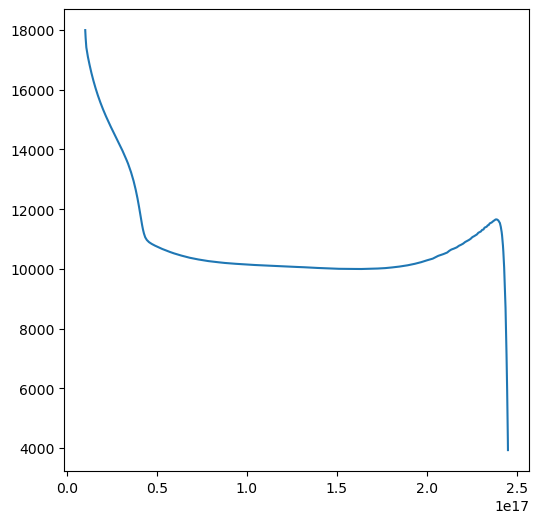

In [9]:
# Most of the radial varying parameters are easily accessed and ploted.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.te);

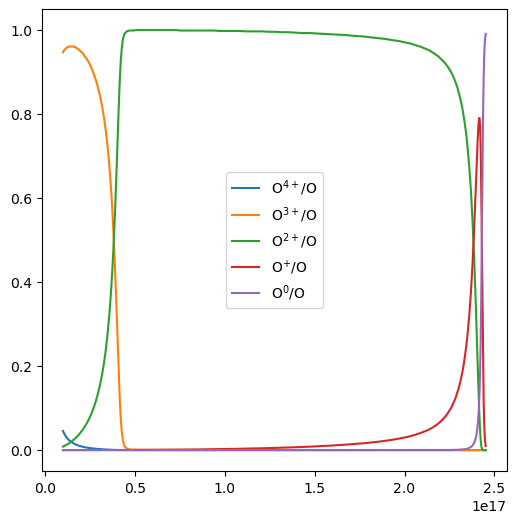

In [10]:
# Ionic fraction of any element are accessible to be ploted versus the radius of the nebula.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.get_ionic('O',4), label=r'O$^{4+}$/O')
ax.plot(M.radius, M.get_ionic('O',3), label=r'O$^{3+}$/O')
ax.plot(M.radius, M.get_ionic('O',2), label=r'O$^{2+}$/O')
ax.plot(M.radius, M.get_ionic('O',1), label=r'O$^{+}$/O')
ax.plot(M.radius, M.get_ionic('O',0), label=r'O$^{0}$/O')
ax.legend(loc='best');

In [11]:
# Electron temeprature weighted by ionic fraction and electron density are also available.
print(r'<Te>$_{O^0/O.Ne}$ =', M.get_T0_ion_vol_ne('O',0))
print(r'<Te>$_{O^+/O.Ne}$ =', M.get_T0_ion_vol_ne('O',1))
print(r'<Te>$_{O^{2+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',2))
print(r'<Te>$_{O^{3+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',3))

<Te>$_{O^0/O.Ne}$ = 10084.283497509447
<Te>$_{O^+/O.Ne}$ = 11161.057311931325
<Te>$_{O^{2+}/O.Ne}$ = 10411.943156013995
<Te>$_{O^{3+}/O.Ne}$ = 14002.001143134104


In [12]:
# Ionic fractions (weighted by Ne or not)
print(M.get_ab_ion_vol('O',2))
print(M.get_ab_ion_vol_ne('O',2))

0.8771567872171203
0.9003813330494747


In [13]:
# A ploting tool to visualize the spectra is available.
help(M.plot_spectrum)
print('---------------')
help(M.get_cont_x)
print('---------------')
help(M.get_cont_y)

Help on method plot_spectrum in module pyCloudy.c1d.cloudy_model:

plot_spectrum(xunit='eV', cont='ntrans', yunit='es', ax=None, xlog=True, ylog=True, **kargv) method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    plot the spectrum of the model.
    parameters:
        - xunit ['eV']. See get_cont_y for details
        - cont ['ntrans']. See get_cont_y for details
        - yunit ['es']. See get_cont_y for details
        - ax: axis matplotlib object
        - xlog [True]
        - ylog [True]
        - **kargv passed to the plot.

---------------
Help on method get_cont_x in module pyCloudy.c1d.cloudy_model:

get_cont_x(unit='Ryd') method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    param:
        unit : one of ['Ryd','eV','Ang','mu','cm-1','Hz', 'kHz', 'MHz', 'GHz']
    return:
        continuum X: wavelength, energys, wv number, or frequency

---------------
Help on method get_cont_y in module pyCloudy.c1d.cloudy_model:

get_cont_y(cont='incid', unit='es', dist_norm=

(0.0, 100000.0)

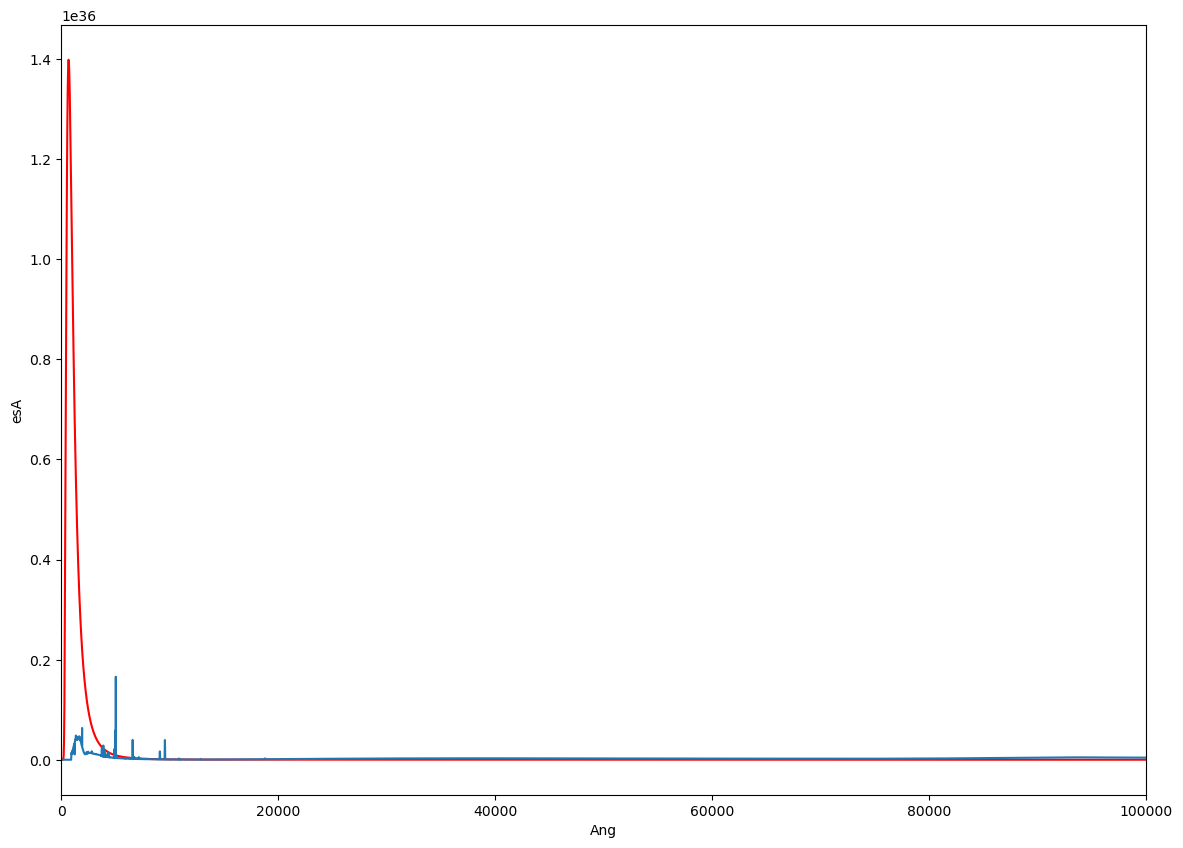

In [14]:
# The area under the red curve and under the blue curve are the same (in IR the blue curve is slightly over the red one)
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA', xlog=False, ylog=False)
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', yunit='esA', xlog=False, ylog=False)
ax.set_xlim((0, 1e5))

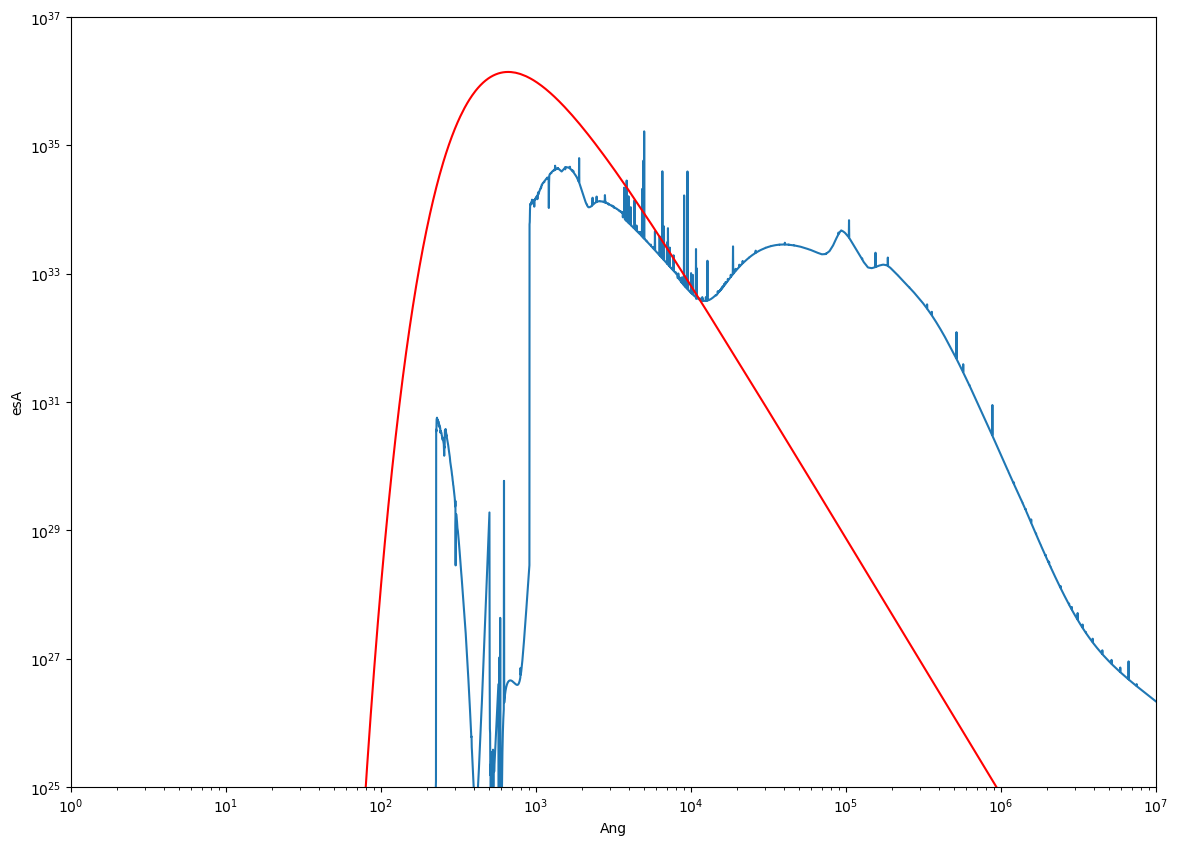

In [15]:
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(ax=ax, xunit='Ang', yunit='esA')
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA')
ax.set_xlim((1, 1e7))
ax.set_ylim((1e25, 1e37));

# Grid of models

In [16]:
# A function is used to produce input file dpeending on a given parameter, here the inner radius.
def make_model(name, radius):
    # The name of the model must depend on the varying parameter, to avoid overwriting of the files
    Min = pc.CloudyInput('../models/{}_{}'.format(name, radius)) 
    Min.set_BB(Teff=43600, lumi_unit='Q(H)', lumi_value=49.34)
    Min.set_cste_density(4)
    Min.set_radius(radius)
    Min.set_abund(predef='ism', nograins=False)
    Min.set_other(('Cosmic Rays Background'))
    #Min.set_other(('set dr 0'))
    #Min.set_stop(('zone = 1'))    
    Min.print_input() #We do not run the model, only print the input file

In [17]:
# A grid of 6 model input files is done.
name = 'M1'
for radius in np.linspace(13, 23,6):
    make_model(name, radius)

In [21]:
# This will create a Makefile in the model directory
# The make command is used to run the models in parallel
pc.print_make_file('../models')

In [22]:
!cat ../models/Makefile

CLOUDY = /usr/local/Cloudy/c23.01/source/cloudy.exe

SRC = $(wildcard ${name}*.in)
OBJ = $(SRC:.in=.out)

# Usage: make -j N name='NAME'
# N is the number of processors
# optional: NAME is a generic name, all models named NAME*.in will be run
# C. Morisset

all: $(OBJ)

%.out: %.in
	-$(CLOUDY) -p  $(basename $< )
# Notice the previous line has TAB in first column


In [23]:
# The 6 models are run using the Makefile
pc.run_cloudy(dir_='../models', n_proc=6, use_make=True)

make: [M1_15.0.out] Error 2 (ignored)
make: [M1_13.0.out] Error 2 (ignored)


In [24]:
# The models are read into a list of CloudyModel objects
Ms = pc.load_models('../models/M1_', read_emis=False)

In [25]:
# The list is sorted according to the inner radius
Ms = sorted(Ms, key = lambda M:M.r_in)

In [26]:
# It is very easy to loop on any of the model parameters. Here we explore the string describing how Cloudy ended.
for M in Ms:
    print(M.model_name_s, M.out['Cloudy ends'])

M1_13.0  Cloudy ends: 437 zones, 1 iteration, 20 warnings, 2 cautions. (single thread) ExecTime(s) 399.57

M1_15.0  Cloudy ends: 319 zones, 1 iteration, 16 warnings, 3 cautions. (single thread) ExecTime(s) 355.31

M1_17.0  Cloudy ends: 214 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 309.07

M1_19.0  Cloudy ends: 114 zones, 1 iteration, 1 caution. (single thread) ExecTime(s) 130.34



In [27]:
# Using list comprehension, it is easy to generate tables of the varying parameters.
print('Inner R', ['{:8.2f}'.format(np.log10(M.r_in)) for M in Ms])
print('Outer R', ['{:8.2f}'.format(np.log10(M.r_out)) for M in Ms])
print('<Te>   ', ['{:8.2f}'.format(M.T0) for M in Ms])
print('<logU> ', ['{:8.2f}'.format(M.log_U_mean_ne) for M in Ms])
print('H0/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',0)) for M in Ms])
print('H+/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',1)) for M in Ms])
print('H2/H   ', ['{:8.2f}'.format(2*M.get_ab_ion_vol_ne('H',2)) for M in Ms])
print('O++/O  ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('O',2)) for M in Ms])

Inner R ['   13.00', '   15.00', '   17.00', '   19.00']
Outer R ['   17.38', '   17.38', '   17.47', '   19.00']
<Te>    ['10535.55', '10532.55', '10002.05', ' 8084.58']
<logU>  ['   -0.51', '   -0.51', '   -0.86', '   -4.24']
H0/H    ['    0.01', '    0.01', '    0.01', '    0.25']
H+/H    ['    0.99', '    0.99', '    0.99', '    0.75']
H2/H    ['    0.00', '    0.00', '    0.00', '    0.00']
O++/O   ['    0.90', '    0.90', '    0.91', '    0.00']


In [28]:
# In case of models where only one zone has been run, a special treatment is needed
Tinit = [M.te if M.te.ndim==0 else M.te[0] for M in Ms]
print('Te_init', ['{:8.2f}'.format(Ti) for Ti in Tinit])

Te_init ['41328.00', '21441.00', '11963.00', ' 8491.10']


(10, 100000000.0)

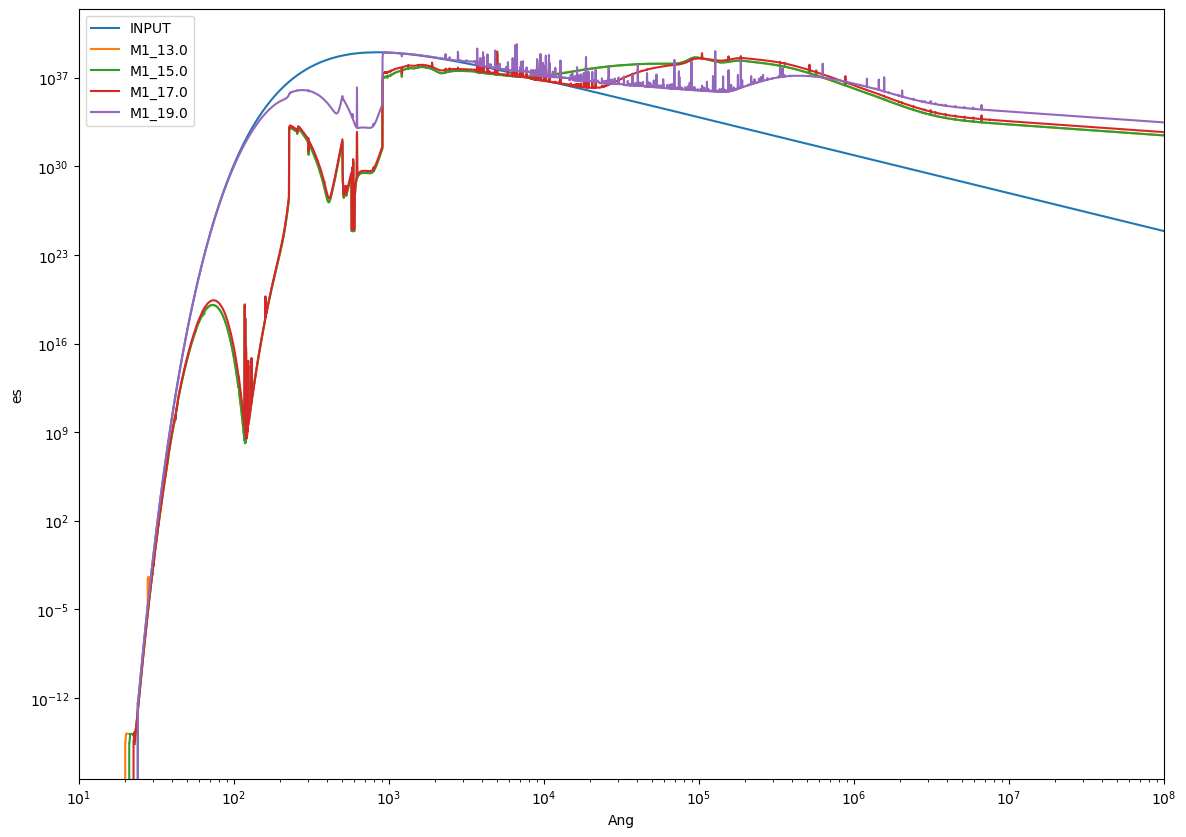

In [29]:
# Overplotting of the spectra of all the models is easy obtained
f, ax = plt.subplots(figsize=(14, 10))
M.plot_spectrum(label='INPUT', ax=ax, xunit='Ang', cont='incid')
for M in Ms:
    M.plot_spectrum(label=M.model_name_s, ax=ax, xunit='Ang')
ax.legend()
ax.set_xlim((10, 1e8))